In [15]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [16]:
# Load Data
df = pd.read_csv('Student_Performance.csv')
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

X = df.drop('Performance Index', axis=1).values
y = df['Performance Index'].values

In [17]:
# Scaling Using Sklearn version of  Z-score logic
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
# TEsting the manual approach
from course_labs.linear_regression import (
    compute_cost_multi_variable,
    compute_gradient,
    gradient_descent_multi_variable
)

In [19]:
initial_w = np.zeros(X_scaled.shape[1])
initial_b = 0.
alpha = 0.1
iters = 1000

w_manual, b_manual, j_hist = gradient_descent_multi_variable(
    X_scaled, y, initial_w, initial_b,
    compute_cost_multi_variable, compute_gradient,
    alpha, iters
)
y_pred_manual = np.dot(X_scaled, w_manual) + b_manual

Iteration    0: Cost  1385.26
Iteration  100: Cost     2.08
Iteration  200: Cost     2.08
Iteration  300: Cost     2.08
Iteration  400: Cost     2.08
Iteration  500: Cost     2.08
Iteration  600: Cost     2.08
Iteration  700: Cost     2.08
Iteration  800: Cost     2.08
Iteration  900: Cost     2.08


In [20]:
# Via scikit-learn
lr_model = LinearRegression()
lr_model.fit(X_scaled, y)
y_pred_sklearn = lr_model.predict(X_scaled)

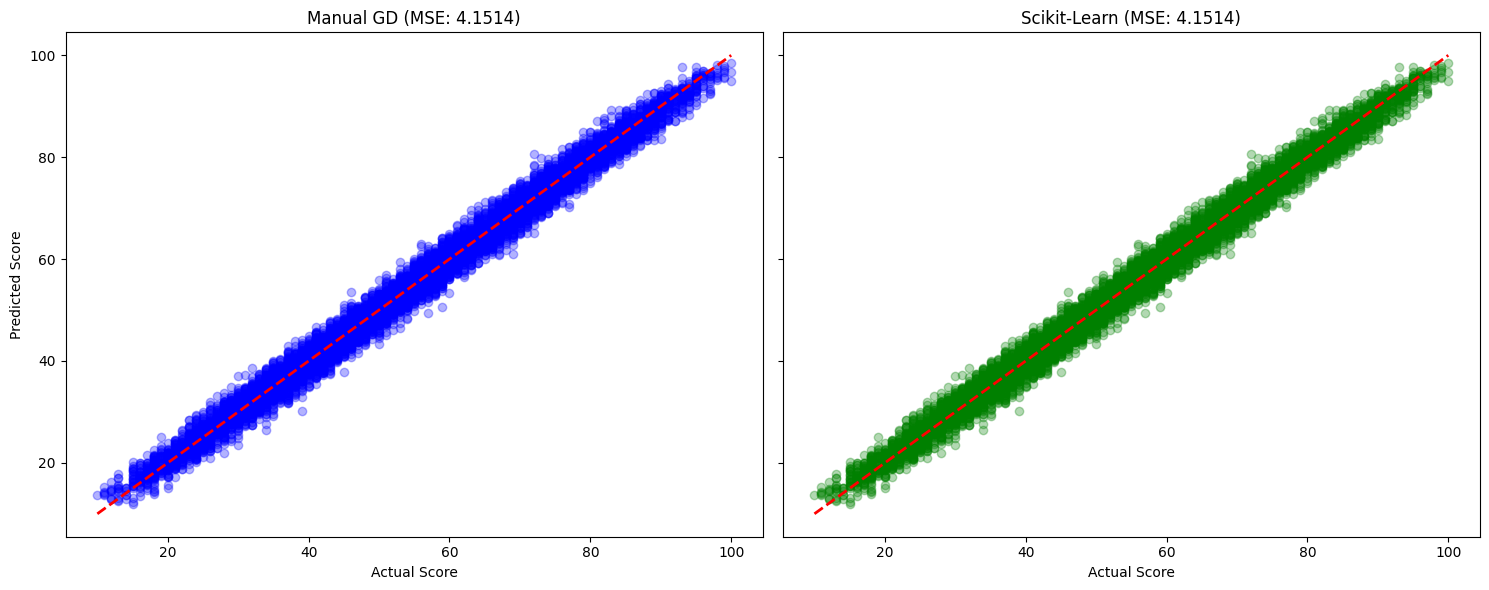

--- WEIGHT COMPARISON ---
Manual W:  [ 7.38688215 17.66197609  0.30643222  0.81492275  0.55567035]
Sklearn W: [ 7.38688215 17.66197609  0.30643222  0.81492275  0.55567035]

Manual B:  55.2248
Sklearn B: 55.2248


In [21]:
# Comparision of manual model vs scikit learn model result

import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# Plot 1: Manual Model Accuracy
ax1.scatter(y, y_pred_manual, alpha=0.3, color='blue')
ax1.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
ax1.set_title(f"Manual GD (MSE: {mean_squared_error(y, y_pred_manual):.4f})")
ax1.set_xlabel("Actual Score")
ax1.set_ylabel("Predicted Score")

# Plot 2: Scikit-Learn Accuracy
ax2.scatter(y, y_pred_sklearn, alpha=0.3, color='green')
ax2.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
ax2.set_title(f"Scikit-Learn (MSE: {mean_squared_error(y, y_pred_sklearn):.4f})")
ax2.set_xlabel("Actual Score")

plt.tight_layout()
plt.show()

# --- PARAMETER CHECK ---
print("--- WEIGHT COMPARISON ---")
print(f"Manual W:  {w_manual}")
print(f"Sklearn W: {lr_model.coef_}")
print(f"\nManual B:  {b_manual:.4f}")
print(f"Sklearn B: {lr_model.intercept_:.4f}")